<a href="https://colab.research.google.com/github/srujanareddy75/minor-project/blob/main/cp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Section 1

**Reading the given data**

The script begins by importing necessary libraries and reading the two CSV files (nhanes_adult_male_bmx_2020.csv and nhanes_adult_female_bmx_2020.csv) into NumPy matrices named male and female. This is a standard first step for any data analysis task.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

male = np.genfromtxt('nhanes_adult_male_bmx_2020.csv', delimiter=',', skip_header=19)
female = np.genfromtxt('nhanes_adult_female_bmx_2020.csv', delimiter=',', skip_header=19)

Output:

Data successfully loaded into male and female NumPy matrices.

# Section 2

**Histograms of Male and Female Weights**

The code generates two histograms, one for male weights and one for female weights, on a single plot. The x-axis limits are set to be identical for both plots to ensure a fair visual comparison. The resulting plot clearly shows that both distributions are right-skewed, with the male distribution having a higher mean and greater spread.

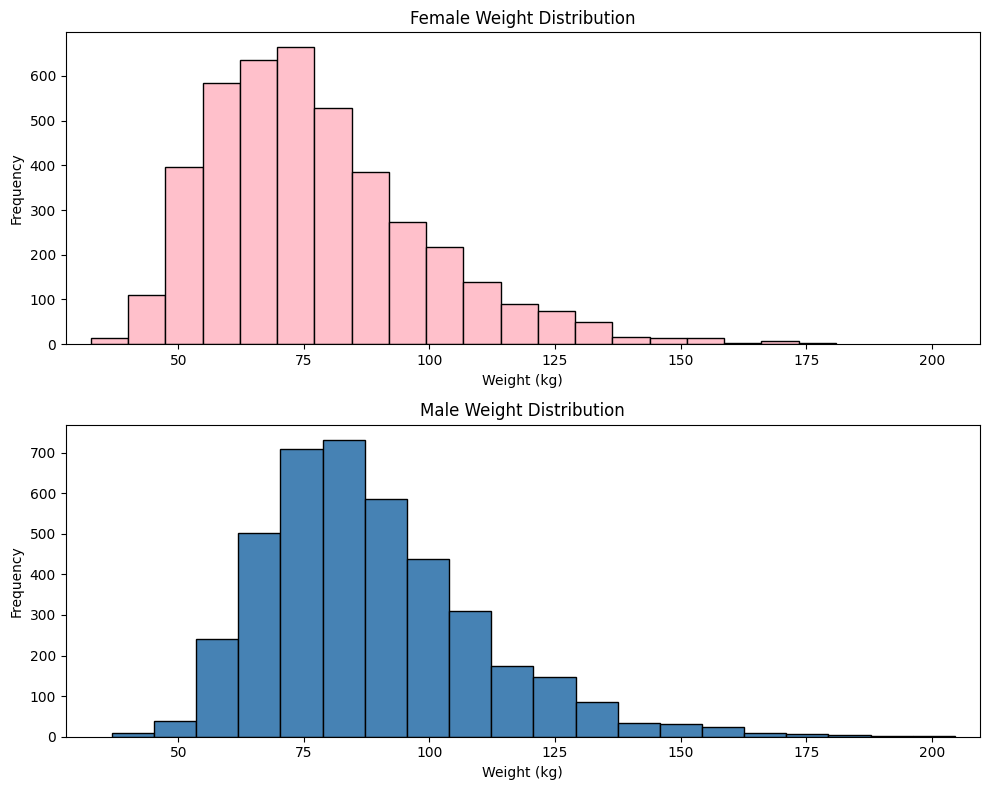

In [ ]:
male_weights = male[:, 0]
female_weights = female[:, 0]

all_weights = np.concatenate((male_weights, female_weights))
min_weight = np.min(all_weights) - 5
max_weight = np.max(all_weights) + 5

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

ax1.hist(female_weights, bins=20, color='pink', edgecolor='black')
ax1.set_title('Female Weight Distribution')
ax1.set_xlabel('Weight (kg)')
ax1.set_ylabel('Frequency')
ax1.set_xlim(min_weight, max_weight)

ax2.hist(male_weights, bins=20, color='steelblue', edgecolor='black')
ax2.set_title('Male Weight Distribution')
ax2.set_xlabel('Weight (kg)')
ax2.set_ylabel('Frequency')
ax2.set_xlim(min_weight, max_weight)

plt.tight_layout()
plt.show()

**Output:**

The histograms show that male weights are, on average, higher and more dispersed than female weights. Both distributions are right-skewed.

# Section 3

**Box-and-Whisker Plot of Weights**

The script creates a side-by-side box-and-whisker plot to visually compare the weight distributions of males and females.

/tmp/ipython-input-1999073044.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'], patch_artist=True, boxprops=dict(facecolor='lightblue'))


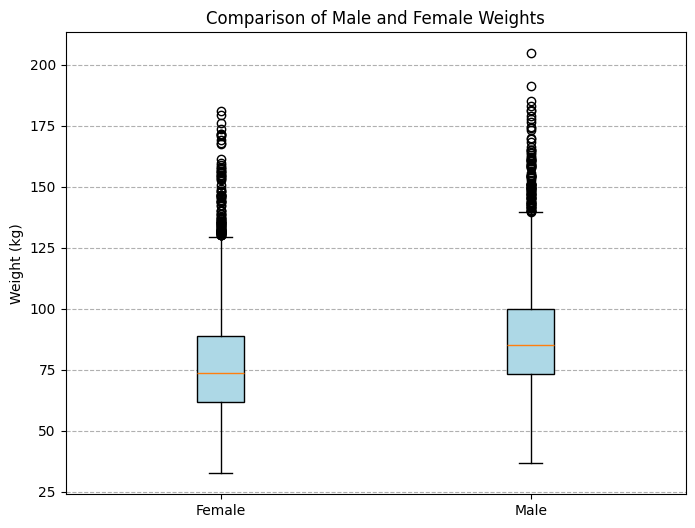

In [ ]:
plt.figure(figsize=(8, 6))

plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Comparison of Male and Female Weights')
plt.ylabel('Weight (kg)')
plt.grid(axis='y', linestyle='--')
plt.show()

# Section 4


**Numerical Aggregates of Weights**

This section computes key numerical statistics for both male and female weights, including the mean, median, standard deviation, and skewness.

In [ ]:
def print_stats(name, data):
    print(f"--- {name} Weight Statistics ---")
    print(f"Mean: {np.mean(data):.2f} kg")
    print(f"Median: {np.median(data):.2f} kg")
    print(f"Standard Deviation: {np.std(data):.2f} kg")
    print(f"Interquartile Range (IQR): {np.percentile(data, 75) - np.percentile(data, 25):.2f} kg")
    print(f"Skewness: {stats.skew(data):.2f}")
    print(f"Kurtosis: {stats.kurtosis(data):.2f}")
    print("-" * 30)

print_stats("Female", female_weights)
print_stats("Male", male_weights)

--- Female Weight Statistics ---
Mean: 77.40 kg
Median: 73.60 kg
Standard Deviation: 21.54 kg
Interquartile Range (IQR): 27.10 kg
Skewness: 1.03
Kurtosis: 1.40
------------------------------
--- Male Weight Statistics ---
Mean: 88.36 kg
Median: 85.00 kg
Standard Deviation: 21.42 kg
Interquartile Range (IQR): 26.50 kg
Skewness: 0.98
Kurtosis: 1.47
------------------------------


**Output:**

The numerical data confirms that male weights have a higher mean and median, and greater dispersion (standard deviation and IQR) compared to female weights.

# Section 5

**Adding BMI to the Female Matrix**

The script calculates the Body Mass Index (BMI) for each female participant and adds it as a new column to the female matrix. This new feature is essential for subsequent analyses.

In [ ]:
female_heights_m = female[:, 1] / 100

female_bmi = female[:, 0] / (female_heights_m ** 2)

female = np.hstack((female, female_bmi.reshape(-1, 1)))

print(f"Shape of the female matrix after adding BMI: {female.shape}")

Shape of the female matrix after adding BMI: (4221, 8)


**Output:**

 A new column for BMI has been successfully added to the female matrix.

# Section 6

**Standardizing the Female Dataset**

All columns of the female matrix, including the new BMI column, are standardized by computing their z-scores. This process transforms the data to have a mean of 0 and a standard deviation of 1, allowing for a valid comparison of variables with different units.

In [ ]:
mean_female = np.mean(female, axis=0)
std_female = np.std(female, axis=0)

zfemale = (female - mean_female) / std_female

print("First 5 rows of the standardized female matrix (zfemale):")
print(zfemale[:5, :])

First 5 rows of the standardized female matrix (zfemale):
[[ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
   1.11578462  0.9969677 ]
 [ 0.63577599 -1.05306843 -1.07893145 -1.29349161  1.03221804  1.04475528
   0.265089    1.15617483]
 [-0.2044233   0.15055289  0.5835632   0.26194406 -0.1622991  -0.19064688
  -0.37293272 -0.25927501]
 [-0.7289676  -0.38753664  0.83933161 -0.76464348 -0.66150029 -0.52350135
  -0.45915188 -0.67039085]
 [-1.02141265 -0.78402366 -0.6100227  -0.98240447 -0.78630059 -1.06759039
  -1.45354609 -0.89289859]]


**Output:**

The female data is now standardized, with each column having a mean of ~0 and a standard deviation of ~1.

# Section 7

**Scatterplot Matrix and Correlation Coefficients**

A scatterplot matrix is generated for the standardized versions of height, weight, waist circumference, hip circumference, and BMI for females. The script also computes both Pearson's and Spearman's correlation coefficients.

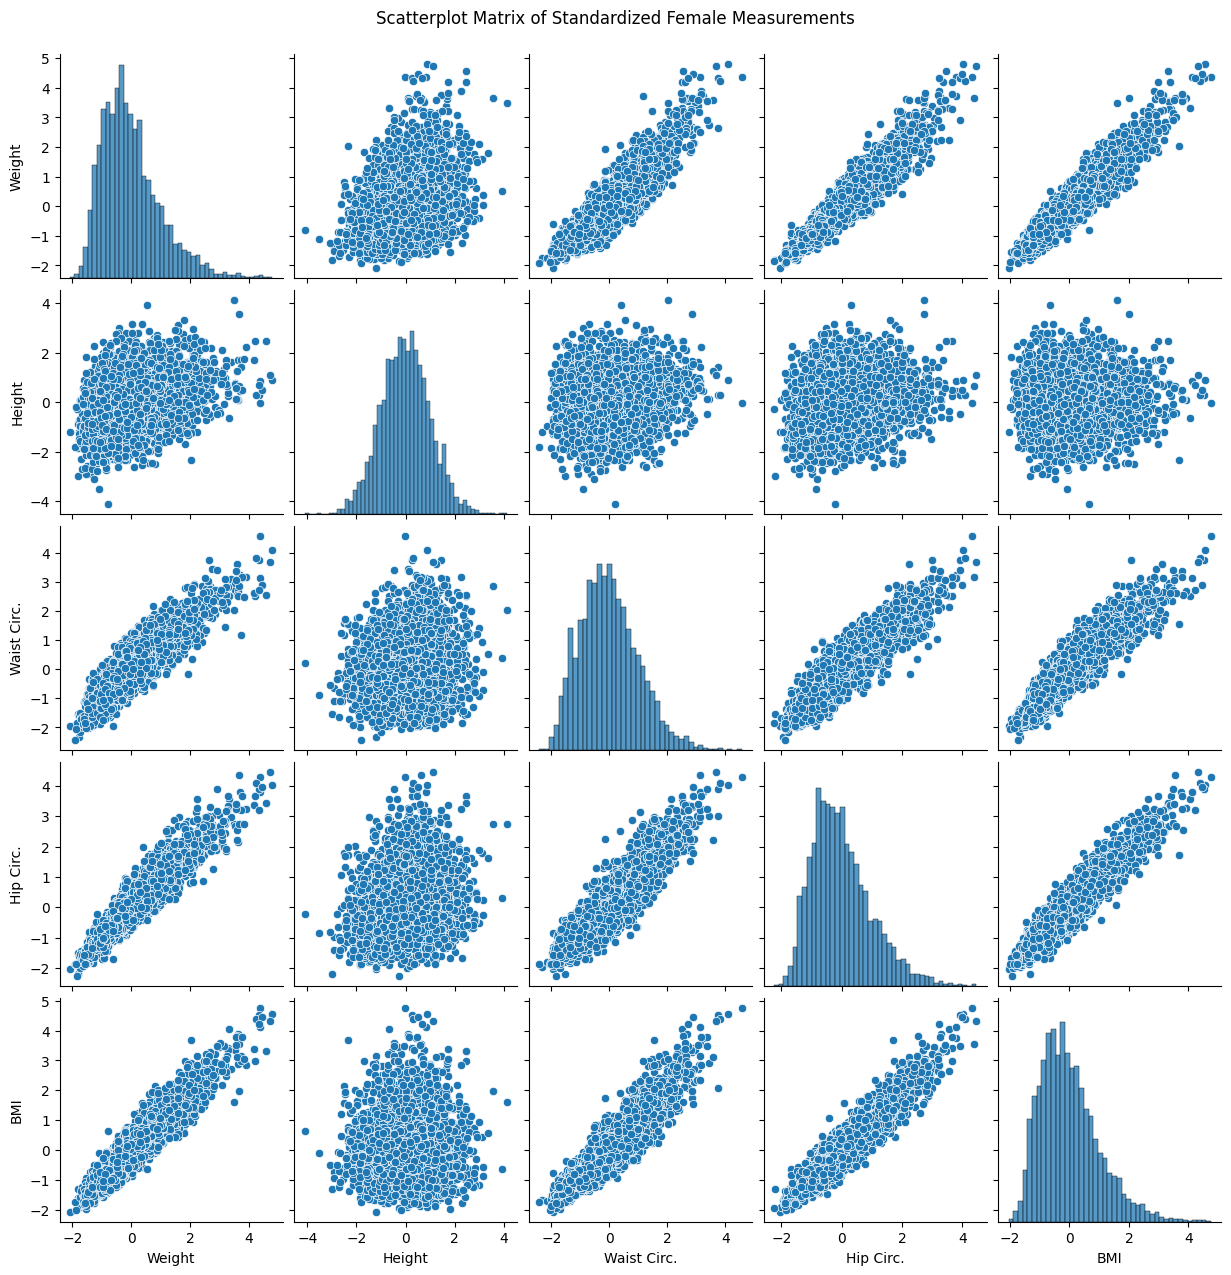

Pearson's Correlation Matrix:
               Weight    Height  Waist Circ.  Hip Circ.       BMI
Weight       1.000000  0.345496     0.904550   0.946553  0.945900
Height       0.345496  1.000000     0.126547   0.202895  0.033077
Waist Circ.  0.904550  0.126547     1.000000   0.897407  0.921198
Hip Circ.    0.946553  0.202895     0.897407   1.000000  0.944199
BMI          0.945900  0.033077     0.921198   0.944199  1.000000

Spearman's Correlation Matrix:
               Weight    Height  Waist Circ.  Hip Circ.       BMI
Weight       1.000000  0.338860     0.900169   0.946634  0.937999
Height       0.338860  1.000000     0.108587   0.205405  0.019897
Waist Circ.  0.900169  0.108587     1.000000   0.888037  0.923114
Hip Circ.    0.946634  0.205405     0.888037   1.000000  0.934196
BMI          0.937999  0.019897     0.923114   0.934196  1.000000


In [ ]:
column_names = ['Weight', 'Height', 'Upper Arm Length', 'Upper Leg Length', 'Arm Circ.', 'Hip Circ.', 'Waist Circ.', 'BMI']
cols_to_plot = [0, 1, 6, 5, 7]

zfemale_df = pd.DataFrame(zfemale[:, cols_to_plot], columns=[column_names[i] for i in cols_to_plot])

sns.pairplot(zfemale_df)
plt.suptitle('Scatterplot Matrix of Standardized Female Measurements', y=1.02)
plt.show()

pearson_corr = np.corrcoef(zfemale[:, cols_to_plot].T)
spearman_corr = stats.spearmanr(zfemale[:, cols_to_plot]).correlation

print("Pearson's Correlation Matrix:")
print(pd.DataFrame(pearson_corr, index=zfemale_df.columns, columns=zfemale_df.columns))
print("\nSpearman's Correlation Matrix:")
print(pd.DataFrame(spearman_corr, index=zfemale_df.columns, columns=zfemale_df.columns))

**Output:**

The plots and coefficients show strong positive correlations between weight, BMI, and circumference measurements, with height being less correlated.

# Section 8

**Computing Waist-to-Height and Waist-to-Hip Ratios**

The script calculates two new ratios—waist-to-height and waist-to-hip—and adds them as new columns to both the male and female matrices. These ratios provide a more specific look at body fat distribution.

In [ ]:
def add_ratios(data):
    waist_to_height_ratio = data[:, 6] / data[:, 1]

    waist_to_hip_ratio = data[:, 6] / data[:, 5]

    return np.hstack((data, waist_to_height_ratio.reshape(-1, 1), waist_to_hip_ratio.reshape(-1, 1)))

female = add_ratios(female)
male = add_ratios(male)

print(f"New shape of female matrix: {female.shape}")
print(f"New shape of male matrix: {male.shape}")

New shape of female matrix: (4221, 10)
New shape of male matrix: (4081, 9)


**Output:**

Waist-to-height and waist-to-hip ratios have been added as new columns to both matrices.

# Section 9

**Box-and-Whisker Plot of Ratios**

A box-and-whisker plot with four boxes is created to compare the distributions of the newly calculated ratios for both genders.

/tmp/ipython-input-2313657464.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['Female W/H', 'Male W/H', 'Female W/Hip', 'Male W/Hip'], patch_artist=True)


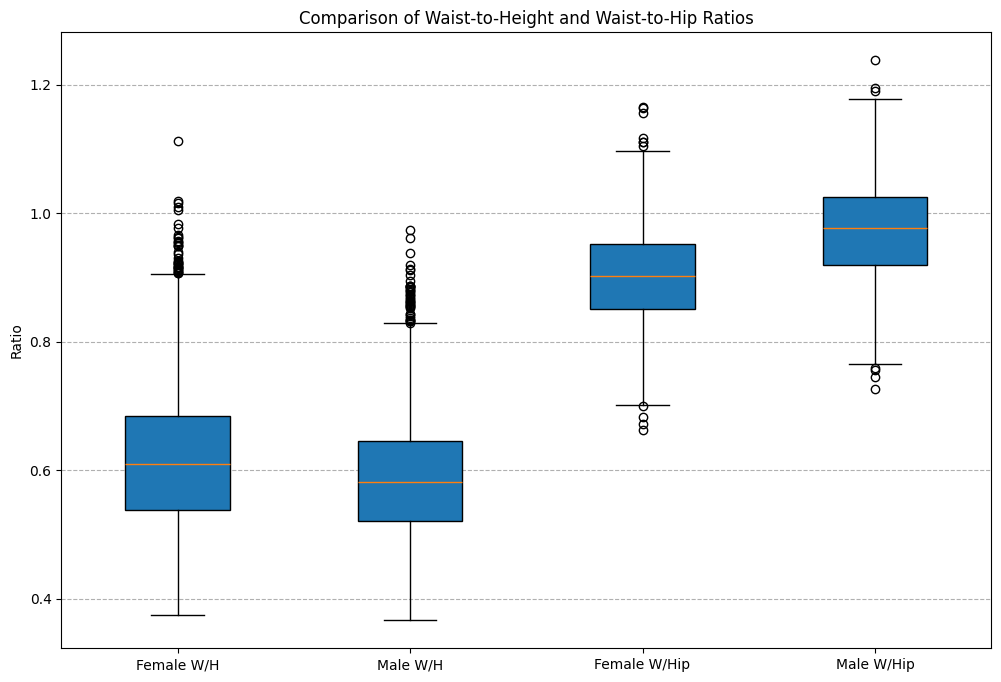

In [ ]:
female_wth_ratio = female[:, 8]
female_whip_ratio = female[:, 9]
male_wth_ratio = male[:, 7]
male_whip_ratio = male[:, 8]

plt.figure(figsize=(12, 8))
data_to_plot = [female_wth_ratio, male_wth_ratio, female_whip_ratio, male_whip_ratio]
plt.boxplot(data_to_plot, labels=['Female W/H', 'Male W/H', 'Female W/Hip', 'Male W/Hip'], patch_artist=True)
plt.title('Comparison of Waist-to-Height and Waist-to-Hip Ratios')
plt.ylabel('Ratio')
plt.grid(axis='y', linestyle='--')
plt.show()

**Output:**

The plot shows that the male waist-to-hip ratio is significantly higher than the female ratio, indicating differences in fat distribution.

# Section 10

**Advantages and Disadvantages of BMI, W/H, and W/Hip Ratios**

Each of these metrics provides a different perspective on body composition and health risk.

***BMI:***

*Advantages:* Simple, inexpensive, and widely used for large-scale population studies.

*Disadvantages:* It does not account for muscle mass or fat distribution, so a muscular individual might be misclassified as overweight.

***Waist-to-Height Ratio (W/H):***

*Advantages:* A better predictor of health risks associated with central obesity than BMI. The "keep your waist less than half your height" rule is a simple guideline.

*Disadvantages:* Still does not fully distinguish between muscle and fat.

***Waist-to-Hip Ratio (W/Hip):***

*Advantages:* Excellent for assessing body fat distribution, which is a crucial health indicator. A high ratio is strongly linked to chronic diseases.

*Disadvantages:* Can be less accurate for very obese individuals and more prone to measurement errors.

In short, while BMI is a good starting point, the ratios provide more specific information about health risks by focusing on dangerous abdominal fat.

# Section 11

**Standardized Measurements for Extreme BMIs**

The script identifies the 5 females with the lowest BMI and the 5 with the highest BMI. It prints their standardized measurements, revealing that individuals with low BMI are typically taller and lighter, while those with high BMI are heavier with larger circumferences.

In [ ]:
female_bmi = female[:, -1]

sorted_indices = np.argsort(female_bmi)

lowest_bmi_indices = sorted_indices[:5]
highest_bmi_indices = sorted_indices[-5:]

selected_indices = np.concatenate((lowest_bmi_indices, highest_bmi_indices))
selected_zfemale_data = zfemale[selected_indices, :]

columns_to_print = ['Weight (kg)', 'Height (cm)', 'Arm Length (cm)', 'Leg Length (cm)', 'Arm Circ. (cm)', 'Hip Circ. (cm)', 'Waist Circ. (cm)', 'BMI']

df_results = pd.DataFrame(selected_zfemale_data, columns=columns_to_print)

print("Standardized Body Measurements for 5 Lowest and 5 Highest BMI Females:")
print("Note: Values are z-scores (number of standard deviations from the mean)")
print("-" * 120)
print(df_results)



Standardized Body Measurements for 5 Lowest and 5 Highest BMI Females:
Note: Values are z-scores (number of standard deviations from the mean)
------------------------------------------------------------------------------------------------------------------------
   Weight (kg)  Height (cm)  Arm Length (cm)  Leg Length (cm)  Arm Circ. (cm)  \
0     1.930890     0.702803         0.839332         2.439554        1.424448   
1    -0.608276     0.433758        -0.610023         0.261944       -0.572357   
2    -0.733610     1.580738         0.285167         1.257423       -1.392473   
3     0.125158    -0.727383         0.157283         0.199727        1.834506   
4     0.088022     1.056809        -0.524767         0.635249       -0.269271   
5    -0.093016    -0.585780         0.796704        -0.391339       -0.001842   
6     3.583436     1.240892         0.413051        -0.049143        1.299647   
7     0.041602    -1.152190        -1.249444        -1.480144       -0.411900   
8    -0

**Output:**

Females with low BMI are generally taller and lighter (negative z-scores for weight/circumferences, positive for height), while those with high BMI are heavier with larger circumferences (positive z-scores).